# Theoretical

1. Can we use Bagging for regression problems ?


Yes, Bagging (Bootstrap Aggregating) can be used for regression problems. In fact, one of the most common implementations of Bagging for regression is the Bagging Regressor in scikit-learn.

###How Bagging Works for Regression:
* Multiple subsets of the training data are created using bootstrap sampling (random sampling with replacement).
* A base regressor (e.g., Decision Tree, Linear Regression, etc.) is trained on each subset.
* The final prediction is obtained by averaging the predictions of all base models

2. What is the difference between multiple model training and single model training ?


The core difference between multiple model training and single model training lies in how the learning process is structured and how predictions are ultimately made. Here's a breakdown:

**Single Model Training:**

* **Process:**
    * A single machine learning algorithm is trained on the entire dataset.
    * The goal is to produce one, unified model that captures the underlying patterns in the data.
* **Outcome:**
    * Results in a single predictive model.
    * Predictions are made directly by this one model.
* **Characteristics:**
    * Simpler to implement and understand.
    * Potentially susceptible to overfitting if the model is too complex for the data.
    * Performance can be heavily influenced by the specific characteristics of the training data.

**Multiple Model Training:**

* **Process:**
    * Multiple instances of the same or different machine learning algorithms are trained.
    * These models are trained on different subsets of the data (e.g., in Bagging) or in a sequential manner (e.g., in Boosting).
    * The predictions of these individual models are then combined.
* **Outcome:**
    * Results in an ensemble of predictive models.
    * Predictions are made by aggregating the outputs of the individual models (e.g., by averaging or voting).
* **Characteristics:**
    * Generally more robust and accurate, as it reduces variance and bias.
    * Can be more computationally expensive.
    * Often more complex to interpret.
    * Example of this is ensemble learning.
* **Key points:**
    * **Diversity:** A crucial aspect of multiple model training is ensuring diversity among the individual models. This is achieved through techniques like bootstrap sampling or feature randomness.
    * **Aggregation:** The method used to combine the predictions of the individual models is also important. Common aggregation methods include averaging (for regression) and voting (for classification).




3. Explain the concept of feature randomness in Random Forest.


The concept of feature randomness is a key component of the Random Forest algorithm, and it plays a vital role in its effectiveness. Here's a breakdown:

**Understanding the Role of Feature Randomness:**

* **Decision Trees and Overfitting:**
    * Individual decision trees are prone to overfitting the training data. This means they can learn the data too well, including its noise, and perform poorly on unseen data.
    * When building a decision tree, the algorithm typically selects the feature that provides the "best" split at each node. This can lead to trees that are highly correlated, as they often rely on the same dominant features.
* **Introducing Randomness:**
    * Random Forest addresses this by introducing randomness in two primary ways:
        * **Bootstrap Sampling (Bagging):** Each tree is trained on a random subset of the data, created by sampling with replacement.
        * **Feature Randomness:** At each node of a tree, instead of considering all features for the best split, the algorithm only considers a random subset of features.
* **How Feature Randomness Works:**
    * When a decision tree in a Random Forest is being built, and it comes time to decide how to split a node, the algorithm doesn't look at every single feature.
    * Instead, it randomly selects a small subset of the available features.
    * It then only considers those randomly selected features when determining the best split.
    * This process is repeated at every node of every tree in the forest.
* **Benefits of Feature Randomness:**
    * **Decreased Correlation:** By limiting the features considered at each split, feature randomness helps to decorrelate the trees in the forest. This is crucial because it ensures that the trees make different kinds of errors, which can be averaged out when making predictions.
    * **Reduced Variance:** Decorrelating the trees reduces the overall variance of the model, which helps to prevent overfitting.
    * **Improved Generalization:** By preventing the trees from relying too heavily on any single feature, feature randomness helps the model to generalize better to unseen data.
    * **Increased Robustness:** This technique makes the model more robust to noisy data.




4. What is OOB (Out-of-Bag) Score ?


The Out-of-Bag (OOB) score is a valuable method for evaluating the performance of ensemble models, particularly those that use bagging, such as Random Forests. Here's a breakdown of the concept:

**Understanding the Basics:**

* **Bagging and Bootstrap Sampling:**
    * Bagging (Bootstrap Aggregating) involves creating multiple subsets of the training data by sampling with replacement. This means some data points will be included multiple times in a subset, while others will be left out.
    * These left-out data points are what we call "out-of-bag" samples.
* **OOB Samples:**
    * For each tree in a Random Forest (or other bagging ensemble), there will be a portion of the original training data that was not used to train that specific tree. These unused data points are the OOB samples for that tree.
* **OOB Score Calculation:**
    * The OOB score leverages these OOB samples to estimate the model's performance without needing a separate validation set.
    * Here's how it works:
        * For each data point in the original training set, identify the trees that did *not* use that data point in their training.
        * Use those trees to predict the outcome for that data point.
        * Aggregate these predictions (e.g., majority vote for classification, average for regression).
        * Compare the aggregated prediction to the actual outcome to assess accuracy.
        * The OOB score represents the overall accuracy of these predictions across all data points.

**Key Advantages:**

* **Efficient Evaluation:**
    * It provides an inherent validation method, eliminating the need for a separate validation set. This is particularly useful when data is limited.
* **Unbiased Estimate:**
    * Because the OOB samples were not used in the training of the respective trees, the OOB score provides a relatively unbiased estimate of the model's generalization performance.



5. How can you measure the importance of features in a Random Forest model ?


Random Forest provides valuable insights into feature importance, helping you understand which variables contribute most significantly to your model's predictions. Here's a breakdown of the primary methods:

**1. Mean Decrease Impurity (Gini Importance):**

* **How it works:**
    * This method measures how much each feature contributes to reducing impurity (e.g., Gini impurity or entropy) within the decision trees of the forest.
    * When a feature is used to split a node, it reduces the impurity of that node. The more a feature reduces impurity across all trees, the more important it's considered.
    * Essentially, it tallies up how much each feature helps to create purer nodes in the trees.
* **Key points:**
    * It's calculated during the training process, making it computationally efficient.
    * It can sometimes favor features with high cardinality (many unique values).
    * This is readily available in the scikit-learn library in python, via the "feature_importances_" attribute of the random forest object.
* **Use case:**
    * This is very quick to calculate, and gives a good general overview of feature importance.

**2. Mean Decrease Accuracy (Permutation Importance):**

* **How it works:**
    * This method assesses feature importance by measuring how much the model's accuracy decreases when a feature's values are randomly permuted (shuffled).
    * If shuffling a feature's values significantly reduces accuracy, it indicates that the feature is crucial for the model's predictions.
    * In essence, it tests how much the model relies on each feature.
* **Key points:**
    * It's generally considered more reliable than Gini importance, especially when dealing with correlated features.
    * It can be computationally more expensive.
    * This is also available within scikit-learn, via the "permutation_importance" function.
* **Use case:**
    * This method is better for getting a more accurate representation of how important a feature is to the model's performance.

**In Summary:**

* Both methods provide valuable insights, but they approach feature importance from different angles.
* Gini importance is efficient and provides a quick overview.
* Permutation importance is more robust and accurate, especially when dealing with complex datasets.

When working with Random Forest, it's often beneficial to use both methods to gain a comprehensive understanding of feature importance.


6. Explain the working principle of a Bagging Classifier.


The Bagging Classifier, short for Bootstrap Aggregating Classifier, is an ensemble learning technique designed to improve the stability and accuracy of machine learning algorithms used for classification. Here's a breakdown of its working principle:

**Core Concepts:**

* **Bootstrap Sampling:**
    * The foundation of Bagging is "bootstrap sampling." This involves creating multiple subsets of the original training data by randomly sampling with replacement.
    * "With replacement" means that a data point can be selected multiple times within a single subset. Therefore, some data points may appear more than once, while others may be left out entirely.
    * This process generates diverse training sets, as each subset will have a slightly different composition.
* **Base Classifiers:**
    * Bagging utilizes "base classifiers," which are the individual machine learning models that are trained on each bootstrap sample.
    * Typically, the same type of classifier is used for all subsets (e.g., decision trees).
    * These base classifiers are often considered "weak learners" because they may have high variance and be prone to overfitting.
* **Parallel Training:**
    * Each base classifier is trained independently on its respective bootstrap sample. This allows for parallel processing, which can significantly speed up the training process.
* **Aggregation (Voting):**
    * Once all the base classifiers are trained, the Bagging Classifier aggregates their predictions to make a final prediction.
    * For classification problems, the most common aggregation method is "majority voting." This means that the class that receives the most votes from the base classifiers is chosen as the final prediction.

**Step-by-Step Process:**

1.  **Create Bootstrap Samples:**
    * Generate multiple bootstrap samples from the original training dataset.
2.  **Train Base Classifiers:**
    * Train a base classifier on each of the bootstrap samples.
3.  **Aggregate Predictions:**
    * When making a prediction on a new data point, each base classifier provides its prediction.
    * The Bagging Classifier then uses majority voting to determine the final prediction.

**Key Benefits:**

* **Reduced Variance:**
    * By training on multiple subsets of the data and aggregating the predictions, Bagging reduces the variance of the model, which helps to prevent overfitting.
* **Improved Accuracy:**
    * Combining the predictions of multiple models often leads to better accuracy than a single model.
* **Increased Robustness:**
    * Bagging makes the model more robust to noisy data and outliers.



7. How do you evaluate a Bagging Classifier’s performance ?


Evaluating the performance of a Bagging Classifier is crucial to understand how well it's generalizing to unseen data. Here's a breakdown of the common evaluation methods:

**1. Out-of-Bag (OOB) Score:**

* **How it works:**
    * As explained earlier, OOB samples are the data points that were not included in the bootstrap sample used to train a specific tree.
    * The OOB score calculates the accuracy of the classifier on these OOB samples, essentially using them as a built-in validation set.
    * This is very effective, and saves the user from having to split the training data to create a validation set.
* **Advantages:**
    * Provides an unbiased estimate of generalization performance.
    * Efficient, as it leverages the data already used in the bagging process.
* **When to use:**
    * Especially useful when data is limited.

**2. Cross-Validation:**

* **How it works:**
    * Techniques like k-fold cross-validation split the training data into k subsets (folds).
    * The model is trained on k-1 folds and evaluated on the remaining fold, and this process is repeated k times.
    * The performance metrics are then averaged across the k folds.
* **Advantages:**
    * Provides a more robust estimate of performance by averaging across multiple splits.
    * Helps to detect overfitting.
* **When to use:**
    * Standard practice for evaluating model performance, especially when you need a reliable estimate of how well the model will perform on unseen data.

**3. Standard Classification Metrics:**

* **Accuracy:**
    * The proportion of correctly classified instances.
* **Precision:**
    * The proportion of correctly predicted positive instances out of all instances predicted as positive.
* **Recall (Sensitivity):**
    * The proportion of correctly predicted positive instances out of all actual positive instances.
* **F1-Score:**
    * The harmonic mean of precision and recall, providing a balanced measure.
* **ROC AUC (Area Under the Receiver Operating Characteristic Curve):**
    * Measures the model's ability to distinguish between classes, especially useful for imbalanced datasets.
* **Confusion Matrix:**
    * A table that shows the number of correct and incorrect predictions for each class, providing detailed insights into the model's performance.
* **When to use:**
    * These metrics are used in all classification problems, and you choose the metrics that are most important to the problem you are trying to solve. For example, if false negatives are very costly, you would focus on recall.

**Key Considerations:**

* **Imbalanced Datasets:**
    * If your dataset has an imbalanced class distribution, accuracy alone can be misleading. Consider using metrics like precision, recall, F1-score, and ROC AUC.
* **Problem Context:**
    * The best evaluation metrics depend on the specific problem you're trying to solve. Choose metrics that align with your goals and priorities.
* **Scikit-learn:**
    * The scikit-learn library in Python provides convenient functions for calculating all of these evaluation metrics.



8. How does a Bagging Regressor work ?


A Bagging Regressor follows a very similar principle to a Bagging Classifier, but it's tailored for regression tasks (predicting continuous values). Here's a breakdown of how it works:

**Core Concepts:**

* **Bootstrap Sampling:**
    * Just like in Bagging Classification, the Bagging Regressor starts by creating multiple bootstrap samples from the training data. This involves randomly sampling data points with replacement, resulting in diverse subsets of the original data.
* **Base Regressors:**
    * Instead of training classifiers, the Bagging Regressor trains multiple base regressors on each bootstrap sample. These are typically the same type of regression model (e.g., decision tree regressors).
    * These base regressors are often "weak learners" that might have high variance.
* **Parallel Training:**
    * Each base regressor is trained independently on its corresponding bootstrap sample, enabling parallel processing.
* **Aggregation (Averaging):**
    * The key difference lies in how the predictions are aggregated. For regression, the Bagging Regressor typically averages the predictions of all the base regressors.
    * This means that when making a prediction for a new data point, each base regressor provides its predicted continuous value, and these values are then averaged to produce the final prediction.

**Step-by-Step Process:**

1.  **Create Bootstrap Samples:**
    * Generate multiple bootstrap samples from the training dataset.
2.  **Train Base Regressors:**
    * Train a base regressor on each bootstrap sample.
3.  **Aggregate Predictions:**
    * When making a prediction on a new data point, each base regressor provides its predicted value.
    * The Bagging Regressor then calculates the average of these predicted values to produce the final prediction.

**Key Benefits:**

* **Reduced Variance:**
    * By training on multiple subsets and averaging the predictions, the Bagging Regressor reduces the variance of the model, leading to more stable and reliable predictions.
* **Improved Accuracy:**
    * Averaging the predictions of multiple regressors often results in better overall accuracy compared to a single regressor.
* **Increased Robustness:**
    * The Bagging Regressor is more robust to noisy data and outliers.




9. What is the main advantage of ensemble techniques ?


The main advantage of ensemble techniques is their ability to **improve prediction performance** by combining the strengths of multiple models. This improvement generally manifests in two key ways:

* **Reduced Variance:**
    * Ensemble methods, particularly bagging, reduce the variance of predictions. This means the model's predictions are less sensitive to small fluctuations in the training data, leading to more stable and consistent results.
* **Reduced Bias:**
    * Ensemble methods, particularly boosting, reduce the bias of predictions. This means the model is better able to capture the underlying patterns in the data, even if individual models are relatively simple.

Here's a more comprehensive breakdown:

* **Increased Accuracy:**
    * By combining the predictions of multiple models, ensemble techniques often achieve higher accuracy than any single model could achieve on its own.
* **Improved Robustness:**
    * Ensemble models are generally more robust to noisy data and outliers, as the errors of individual models tend to cancel each other out.
* **Enhanced Generalization:**
    * Ensemble methods help models generalize better to unseen data, reducing the risk of overfitting.
* **Better Handling of Complex Data:**
    * Ensemble techniques can effectively handle complex datasets with intricate relationships between features.




10. What is the main challenge of ensemble methods ?


While ensemble methods offer significant advantages, they also come with certain challenges. The main challenge is **increased complexity**, which manifests in several ways:

* **Computational Cost:**
    * Training multiple models, especially with large datasets, can be computationally expensive. This is particularly true for boosting methods, which train models sequentially.
    * The time required for both training and prediction can be significantly higher compared to single models.
* **Reduced Interpretability:**
    * Ensemble models, especially those with many base learners, can be very complex and difficult to interpret.
    * Understanding how the ensemble arrives at a particular prediction can be challenging, making it difficult to gain insights into the underlying relationships in the data.
* **Increased Memory Usage:**
    * Storing multiple models requires more memory than storing a single model.
* **Potential for Overfitting (in some cases):**
    * While ensemble methods are generally good at reducing overfitting, if not used correctly, they can overfit. For example, if boosting is run for too many rounds, it can start to overfit the training data.
* **Complexity of Tuning:**
    * Ensemble methods often have more hyperparameters to tune than single models. This can make the model selection and optimization process more complex.
* **Difficulty in real time applications:**
    * Due to the computational complexity, it can be difficult to use some ensemble methods in real time applications, where predictions are needed very fast.



11. Explain the key idea behind ensemble techniques.


The key idea behind ensemble techniques is to **combine the predictive power of multiple individual models to create a more robust and accurate overall model**. This is based on the principle that "the wisdom of the crowd" often outperforms the judgment of a single expert.

Here's a breakdown of the core concepts:

* **Diversity:**
    * Ensemble methods strive to create a collection of diverse models. This diversity is crucial because it ensures that the models make different kinds of errors.
    * Diversity is achieved through various techniques, such as:
        * **Bootstrap sampling (Bagging):** Training models on different subsets of the data.
        * **Feature randomness (Random Forest):** Training models on different subsets of features.
        * **Sequential learning (Boosting):** Training models to correct the errors of previous models.
* **Aggregation:**
    * Once the individual models are trained, their predictions are combined to produce a final prediction.
    * Common aggregation methods include:
        * **Voting (Classification):** Selecting the class that receives the most votes from the individual models.
        * **Averaging (Regression):** Calculating the average of the predictions from the individual models.
        * **Weighted averaging/voting (Stacking, Boosting):** Giving more weight to the predictions of more accurate models.
* **Error Reduction:**
    * By combining the predictions of diverse models, ensemble methods can effectively reduce both bias and variance.
        * **Variance reduction (Bagging):** Averaging out the errors of individual models reduces the overall variance of the ensemble.
        * **Bias reduction (Boosting):** Sequentially training models to correct errors reduces the overall bias of the ensemble.

In essence, ensemble techniques aim to create a "super model" by leveraging the strengths of multiple "weak" or moderately good models. The goal is to create a model that is more accurate, robust, and reliable than any single model could achieve on its own.


12. What is a Random Forest Classifier ?


A Random Forest Classifier is a powerful and widely used ensemble learning method for classification tasks. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Here's a breakdown of its key features and how it works:

**Key Characteristics:**

* **Ensemble Method:**
    * It's an ensemble method, meaning it combines the predictions of multiple models to improve overall performance.
* **Decision Trees:**
    * It's built upon decision trees, which are tree-like structures that make decisions based on features.
* **Randomness:**
    * It introduces randomness in two primary ways:
        * **Bootstrap Sampling (Bagging):** Each decision tree is trained on a random subset of the training data, created by sampling with replacement. This means some data points may be included multiple times, while others may be left out.
        * **Feature Randomness:** When building each tree, at each node, only a random subset of features is considered for splitting. This adds further diversity to the trees.
* **Aggregation:**
    * For classification, the Random Forest aggregates the predictions of all the individual decision trees through majority voting. The class that receives the most votes is the final prediction.

**How it Works:**

1.  **Bootstrap Sampling:**
    * Create multiple bootstrap samples (random samples with replacement) from the training data.
2.  **Decision Tree Construction:**
    * For each bootstrap sample, build a decision tree.
    * At each node of the tree, instead of considering all features for the best split, randomly select a subset of features.
    * Choose the best split from this random subset.
    * Grow each tree to its maximum size (or until a stopping criterion is met).
3.  **Aggregation (Voting):**
    * When making a prediction on a new data point, each decision tree in the forest provides its classification prediction.
    * The Random Forest Classifier then uses majority voting to determine the final prediction.

**Advantages:**

* **High Accuracy:**
    * It often achieves high accuracy, even with complex datasets.
* **Reduced Overfitting:**
    * The randomness introduced through bootstrap sampling and feature randomness helps to reduce overfitting.
* **Robustness:**
    * It's robust to noisy data and outliers.
* **Feature Importance:**
    * It provides a measure of feature importance, which can be useful for feature selection.
* **Handles both categorical and numerical data.**

**In summary:**

The Random Forest Classifier is a robust and effective ensemble method that leverages the power of multiple decision trees and randomness to achieve high accuracy and reduce overfitting.


13. What are the main types of ensemble techniques ?


The main types of ensemble techniques can be broadly categorized into three main approaches:

1.  **Bagging (Bootstrap Aggregating):**
    * This technique involves training multiple instances of the same base learner on different subsets of the training data.
    * The subsets are created using bootstrap sampling (random sampling with replacement).
    * The predictions of the individual models are then aggregated, typically by voting (for classification) or averaging (for regression).
    * Bagging primarily aims to reduce variance, which helps to prevent overfitting.
    * A prominent example is the Random Forest algorithm.

2.  **Boosting:**
    * Boosting involves training models sequentially, where each subsequent model tries to correct the errors of the previous ones.
    * The models are typically weak learners (models that perform slightly better than random guessing).
    * Boosting focuses on reducing bias, which helps to improve the model's ability to capture complex patterns in the data.
    * Examples include AdaBoost, Gradient Boosting, XGBoost, and LightGBM.

3.  **Stacking (Stacked Generalization):**
    * Stacking involves training multiple different base learners and then training a "meta-learner" to combine their predictions.
    * The meta-learner takes the predictions of the base learners as input and produces the final prediction.
    * Stacking aims to leverage the strengths of different models and improve overall performance.
    * It can be more complex to implement than bagging or boosting.

Here's a quick summary table:

| Technique | Main Goal | How it Works | Examples |
| :-------- | :-------- | :----------- | :------- |
| Bagging   | Reduce Variance | Parallel training, bootstrap sampling, aggregation | Random Forest |
| Boosting  | Reduce Bias | Sequential training, error correction | AdaBoost, Gradient Boosting, XGBoost |
| Stacking  | Combine Strengths | Meta-learner, multiple base learners | Stacked Models |


14. What is ensemble learning in machine learning ?


Ensemble learning in machine learning is a technique that combines the predictions of multiple individual models to produce a final prediction that is more accurate and robust than any of the individual models alone. It's based on the principle that "the wisdom of the crowd" often outperforms the judgment of a single expert.

Here's a breakdown of the key aspects:

**Core Idea:**

* Instead of relying on a single model, ensemble learning trains multiple models and then aggregates their predictions.
* This aggregation can be done through various methods, such as voting (for classification) or averaging (for regression).

**Benefits:**

* **Improved Accuracy:** Ensemble methods often achieve higher accuracy than single models, especially for complex problems.
* **Increased Robustness:** They are more robust to noisy data and outliers, as the errors of individual models tend to cancel each other out.
* **Enhanced Generalization:** They help models generalize better to unseen data, reducing the risk of overfitting.
* **Reduced Variance and Bias:** Depending on the technique used, ensemble methods can reduce both the variance (sensitivity to small fluctuations in the training data) and bias (systematic errors) of the model.

**Key Components:**

* **Base Learners:** These are the individual models that are combined in the ensemble. They can be the same type of model or different types.
* **Aggregation Method:** This is the method used to combine the predictions of the base learners. Common methods include:
    * **Voting:** In classification, each base learner "votes" for a class, and the class with the most votes is chosen.
    * **Averaging:** In regression, the predictions of the base learners are averaged to produce the final prediction.
    * **Weighted Averaging/Voting:** Some models predictions are given more weight than others.
* **Diversity:** The base learners in an ensemble should be diverse, meaning they should make different kinds of errors. This diversity is crucial for the ensemble to be effective.

**Common Ensemble Techniques:**

* **Bagging (Bootstrap Aggregating):** Trains multiple models on different subsets of the data and aggregates their predictions.
* **Boosting:** Trains models sequentially, where each subsequent model tries to correct the errors of the previous ones.
* **Stacking:** Trains a meta-model to combine the predictions of multiple base models.

In essence, ensemble learning is a powerful approach that leverages the strengths of multiple models to create a more accurate and reliable prediction.


15. When should we avoid using ensemble methods ?


While ensemble methods are powerful, they're not always the best choice. Here are scenarios where you might want to avoid using them:

* **When Interpretability Is Crucial:**
    * Ensemble models, especially complex ones like deep boosted trees or stacked models, can be very difficult to interpret. If you need to understand *why* a model is making a particular prediction (e.g., in medical diagnosis or legal applications), a simpler, more interpretable model might be preferable.
* **When Computational Resources Are Limited:**
    * Training multiple models can be computationally expensive, especially with large datasets. If you have limited processing power or time, ensemble methods might not be feasible.
* **When Real-Time Predictions Are Required:**
    * If you need to make predictions very quickly (e.g., in real-time applications like fraud detection or online advertising), the computational overhead of ensemble methods might be a bottleneck.
* **When the Dataset Is Very Small:**
    * Ensemble methods often require a substantial amount of data to train effectively. With very small datasets, the models might overfit or fail to capture meaningful patterns.
* **When the Base Model Is Already Very Strong:**
    * If your base model is already achieving very high performance, the added complexity of an ensemble might not yield significant improvements. In such cases, the extra effort might not be justified.
* **When Simplicity Is Preferred:**
    * Sometimes, a simpler model is preferable, even if it has slightly lower accuracy. If you value simplicity and ease of implementation, a single model might be a better choice.
* **When Development Time is heavily restricted:**
    * Ensemble methods, particularly those that require tuning of many hyperparameters, can take significantly longer to develop than a single model. If time is a strong constraint, a single model may be more appropriate.
* **When the underlying problem is very simple:**
    * If the underlying problem that you are trying to solve is very simple, and linear, then a linear model will likely out perform an ensemble method.

In essence, weigh the benefits of improved performance against the costs of increased complexity, computational resources, and interpretability.


16. How does Bagging help in reducing overfitting ?


Bagging, or Bootstrap Aggregating, is a powerful technique that significantly reduces overfitting in machine learning models. Here's how it achieves this:

**1. Bootstrap Sampling Creates Diverse Training Sets:**

* **Random Subsets:** Bagging generates multiple training subsets by randomly sampling data points from the original dataset *with replacement*. This means some data points might appear multiple times in a subset, while others might be left out.
* **Diversity:** Each bootstrap sample is slightly different, creating diverse training sets. This diversity is crucial for reducing overfitting.

**2. Training Multiple Models Reduces Variance:**

* **Independent Training:** Each bootstrap sample is used to train a separate instance of the base model (e.g., a decision tree). These models are trained independently of each other.
* **Variance Reduction:** Individual models, especially complex ones like deep decision trees, tend to have high variance. This means they are very sensitive to small fluctuations in the training data and can overfit.
* **Averaging Effect:** By training multiple models on different subsets and then aggregating their predictions (averaging for regression, voting for classification), Bagging reduces the overall variance of the ensemble. The errors made by individual models tend to cancel each other out, leading to a more stable and less variable prediction.

**3. Smoothing Out Predictions:**

* **Less Sensitivity to Noise:** The aggregation process smooths out the predictions, making the ensemble less sensitive to noise and outliers in the training data.
* **Generalization:** This smoothing effect helps the model generalize better to unseen data, as it's less likely to be influenced by specific, noisy patterns in the training set.

**In essence:**

* Bagging creates multiple versions of the model, each trained on a slightly different view of the data.
* By aggregating the predictions of these diverse models, it reduces the impact of any single model's tendency to overfit the training data.
* This results in a more robust and generalized model that performs better on unseen data.


17. Why is Random Forest better than a single Decision Tree ?


Random Forest generally outperforms a single Decision Tree due to several key advantages that stem from its ensemble nature and the introduction of randomness. Here's a breakdown:

**1. Reduced Overfitting:**

* **Decision Tree Vulnerability:** Single decision trees are highly prone to overfitting, especially when they grow deep. They can memorize the training data, including its noise, leading to poor performance on unseen data.
* **Random Forest Mitigation:**
    * **Bootstrap Sampling:** Creates diverse training sets, preventing individual trees from memorizing the entire training data.
    * **Feature Randomness:** Limits the features considered at each split, further decorrelating the trees and reducing their tendency to overfit.
    * By averaging the predictions of many decorrelated trees, Random Forest significantly reduces overfitting.

**2. Improved Accuracy:**

* **Ensemble Power:** Combining the predictions of multiple trees, each with slightly different perspectives on the data, leads to a more accurate and robust prediction.
* **Reduced Variance:** The averaging effect of the ensemble reduces the variance of the predictions, resulting in a more stable and accurate model.

**3. Increased Robustness:**

* **Noise and Outliers:** Random Forest is more robust to noisy data and outliers. The averaging process minimizes the impact of individual noisy data points.
* **Feature Importance:** Random Forest provides a reliable measure of feature importance, which can be useful for feature selection and understanding the data.

**4. Better Generalization:**

* **Unseen Data:** Random Forest typically generalizes better to unseen data compared to a single decision tree.
* **Diverse Perspectives:** Because each tree is trained on a different subset of the data and considers a different subset of features, the ensemble captures a wider range of patterns in the data, leading to better generalization.

**5. Handles High-Dimensional Data:**

* Random forest is able to handle datasets with a large number of features reasonably well.

**In summary:**

* A single decision tree is like a single opinion, it can be very wrong.
* Random forest is like many opinions, the average of those opinions is much more likely to be correct.

While a single decision tree can be simple and interpretable, Random Forest's ensemble approach provides a substantial improvement in prediction performance and robustness.


18. What is the role of bootstrap sampling in Bagging ?


Bootstrap sampling plays a fundamental and crucial role in the Bagging (Bootstrap Aggregating) ensemble method. Here's a breakdown of its key functions:

**1. Creating Diverse Training Sets:**

* **Sampling with Replacement:**
    * Bootstrap sampling involves randomly drawing data points from the original training dataset *with replacement*. This means that a data point can be selected multiple times in a single sample, while other data points might be left out.
* **Generating Variability:**
    * This process creates multiple training subsets that are slightly different from each other. Each subset will have a unique composition of data points.
* **Introducing Diversity:**
    * This inherent variability in the training sets is essential for creating diverse base models within the Bagging ensemble.

**2. Reducing Variance:**

* **Training Independent Models:**
    * Each bootstrap sample is used to train an independent instance of the base model (e.g., decision tree).
* **Averaging Effect:**
    * When the predictions of these diverse models are aggregated (averaged for regression, voted for classification), the errors made by individual models tend to cancel each other out.
* **Stabilizing Predictions:**
    * This averaging effect reduces the overall variance of the ensemble, making the predictions more stable and less sensitive to fluctuations in the training data.

**3. Enabling Out-of-Bag (OOB) Evaluation:**

* **Unused Data Points:**
    * Because bootstrap sampling is done with replacement, some data points are not included in each bootstrap sample. These left-out data points are called "out-of-bag" (OOB) samples.
* **Internal Validation:**
    * The OOB samples can be used to evaluate the performance of the Bagging ensemble without needing a separate validation set.
    * This is done by using the models that were not trained on those OOB samples, to predict the results of the OOB samples.
* **Efficient Evaluation:**
    * This provides an efficient and unbiased estimate of the model's generalization performance.

**In essence:**

* Bootstrap sampling introduces controlled randomness into the training process, leading to the creation of diverse base models.
* This diversity is crucial for reducing variance and improving the stability and accuracy of the Bagging ensemble.
* It also allows for an internal validation of the model.


19. What are some real-world applications of ensemble techniques ?


Ensemble techniques are widely used across various industries and domains due to their ability to improve prediction accuracy and robustness. Here are some real-world applications:

**1. Finance:**

* **Fraud Detection:** Ensemble models are used to identify fraudulent transactions by analyzing patterns in financial data. They can detect subtle anomalies that individual models might miss.
* **Credit Risk Assessment:** Banks and financial institutions use ensemble methods to predict the likelihood of loan defaults.
* **Algorithmic Trading:** Ensemble techniques can be used to develop trading strategies by combining predictions from multiple models that analyze market trends and historical data.

**2. Healthcare:**

* **Medical Diagnosis:** Ensemble models can improve the accuracy of medical diagnoses by combining predictions from multiple diagnostic tests and patient data.
* **Drug Discovery:** Ensemble methods can be used to predict the efficacy of new drugs by analyzing molecular structures and biological data.
* **Predicting Patient Outcomes:** Ensemble models can predict patient readmission rates, response to treatments, and other important clinical outcomes.

**3. E-commerce:**

* **Recommendation Systems:** Ensemble techniques enhance recommendation accuracy by combining predictions from various models that analyze user behavior, product features, and collaborative filtering.
* **Customer Churn Prediction:** E-commerce companies use ensemble models to predict which customers are likely to stop using their services.
* **Price Optimization:** Ensemble methods can be used to dynamically adjust prices based on market conditions, competitor pricing, and customer behavior.

**4. Image Recognition and Computer Vision:**

* **Object Detection:** Ensemble models are used in object detection systems to improve the accuracy of identifying objects in images and videos.
* **Facial Recognition:** Ensemble techniques are used to improve the accuracy of facial recognition systems.
* **Medical Image Analysis:** Ensemble models are used to analyze medical images, such as X-rays and MRI scans, to detect abnormalities.

**5. Natural Language Processing (NLP):**

* **Sentiment Analysis:** Ensemble models are used to improve the accuracy of sentiment analysis by combining predictions from multiple models that analyze text data.
* **Spam Detection:** Ensemble techniques are used to filter spam emails by combining predictions from multiple models that analyze email content and metadata.
* **Machine Translation:** Ensemble methods can improve the quality of machine translation by combining predictions from multiple translation models.

**6. Environmental Science:**

* **Weather Forecasting:** Ensemble models are used to improve the accuracy of weather forecasts by combining predictions from multiple weather models.
* **Climate Change Prediction:** Ensemble techniques are used to improve the accuracy of climate change predictions by combining predictions from multiple climate models.
* **Air Quality Prediction:** Ensemble models are used to predict air quality levels by combining data from multiple sensors and environmental models.

**7. Industrial Applications:**

* **Predictive Maintenance:** Ensemble models are used to predict when machines are likely to fail, allowing for proactive maintenance.
* **Quality Control:** Ensemble techniques are used to improve the accuracy of quality control systems by analyzing sensor data and product images.
* **Robotics:** Ensemble methods help robots make more accurate and robust decisions in complex environments.


20. What is the difference between Bagging and Boosting ?

Bagging and boosting are both ensemble learning techniques, but they differ significantly in their approach and goals. Here's a breakdown of the key distinctions:

**1. Training Process:**

* **Bagging (Bootstrap Aggregating):**
    * Trains multiple independent models in parallel.
    * Each model is trained on a different bootstrap sample (random sampling with replacement) of the training data.
* **Boosting:**
    * Trains models sequentially.
    * Each subsequent model attempts to correct the errors made by the previous models.
    * It gives more weight to misclassified instances, so subsequent models focus on them.

**2. Goal:**

* **Bagging:**
    * Primarily aims to reduce variance, which helps to prevent overfitting.
    * It's effective when dealing with high-variance, low-bias models.
* **Boosting:**
    * Primarily aims to reduce bias, which helps to improve the model's ability to capture complex patterns.
    * It can also reduce variance.
    * It is effective when dealing with high-bias, low-variance models.

**3. Model Weighting:**

* **Bagging:**
    * Typically, all models have equal weight in the final prediction.
* **Boosting:**
    * Models are often weighted based on their performance, with more accurate models having a greater influence on the final prediction.

**4. Data Sampling:**

* **Bagging:**
    * Uses bootstrap sampling to create random subsets of the training data.
* **Boosting:**
    * Adjusts the weights of training instances, giving more weight to misclassified instances.

**5. Examples:**

* **Bagging:**
    * Random Forest.
* **Boosting:**
    * AdaBoost, Gradient Boosting, XGBoost, LightGBM.

**In summary:**

* Bagging focuses on reducing variance by training independent models on random subsets of the data.
* Boosting focuses on reducing bias by training models sequentially, with each model correcting the errors of the previous ones.


# Practical

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt=DecisionTreeClassifier()
# Create a Bagging Classifier with Decision Tree as base model
bagging_clf = BaggingClassifier(
    estimator=dt,
    n_estimators=50,  # Number of base models
    random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).


In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a Bagging Regressor with Decision Tree as the base model
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(),  # Use Decision Tree as base model
    n_estimators=50,  # Number of base models
    random_state=42
)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Make predictions
y_pred = bagging_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 2632.0024


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print feature importance scores
feature_importances = pd.DataFrame(
    {'Feature': cancer.feature_names, 'Importance': rf_clf.feature_importances_}
).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Scores:")
print(feature_importances)


Model Accuracy: 0.9649

Feature Importance Scores:
                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error  

24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the results
print(f"Decision Tree MSE: {mse_dt:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

# Compare results
improvement = (mse_dt - mse_rf) / mse_dt * 100
print(f"Random Forest improves MSE by {improvement:.2f}% compared to Decision Tree.")


Decision Tree MSE: 6413.1496
Random Forest MSE: 2609.0939
Random Forest improves MSE by 59.32% compared to Decision Tree.


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier with OOB score enabled
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf.fit(X_train, y_train)

# Compute OOB Score
oob_score = rf_clf.oob_score_
print(f"Out-of-Bag (OOB) Score: {oob_score:.4f}")

# Evaluate on test data
y_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Out-of-Bag (OOB) Score: 0.9560
Test Accuracy: 0.9649


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.


In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with SVM as base model
bagging_svm = BaggingClassifier(
    estimator=SVC(),  # SVM as base estimator
    n_estimators=50,  # Number of base models
    random_state=42
)

# Train the model
bagging_svm.fit(X_train, y_train)

# Make predictions
y_pred = bagging_svm.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of trees to test
n_trees = [10, 50, 100, 200, 500]

# Dictionary to store accuracy results
accuracy_results = {}

# Train and evaluate models with different numbers of trees
for n in n_trees:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[n] = accuracy
    print(f"n_estimators = {n}, Accuracy = {accuracy:.4f}")

# Print summary of results
print("\nFinal Accuracy Comparison:")
for n, acc in accuracy_results.items():
    print(f"{n} trees: {acc:.4f}")


n_estimators = 10, Accuracy = 0.9561
n_estimators = 50, Accuracy = 0.9649
n_estimators = 100, Accuracy = 0.9649
n_estimators = 200, Accuracy = 0.9649
n_estimators = 500, Accuracy = 0.9649

Final Accuracy Comparison:
10 trees: 0.9561
50 trees: 0.9649
100 trees: 0.9649
200 trees: 0.9649
500 trees: 0.9649


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.


In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Classifier with Logistic Regression as base model
bagging_lr = BaggingClassifier(
    estimator=LogisticRegression(max_iter=5000),  # Logistic Regression as base model
    n_estimators=50,  # Number of base models
    random_state=42
)

# Train the model
bagging_lr.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_prob = bagging_lr.predict_proba(X_test)[:, 1]  # Get probability of class 1

# Compute AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9974


29. Train a Random Forest Regressor and analyze feature importance scores.


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Extract feature importance scores
feature_importances = pd.DataFrame(
    {'Feature': [f'Feature {i}' for i in range(X.shape[1])],
     'Importance': rf_regressor.feature_importances_}
).sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores:")
print(feature_importances)


Feature Importance Scores:
     Feature  Importance
3  Feature 3    0.334148
6  Feature 6    0.288473
9  Feature 9    0.207439
2  Feature 2    0.040139
0  Feature 0    0.037408
1  Feature 1    0.035463
7  Feature 7    0.014657
5  Feature 5    0.014583
4  Feature 4    0.013957
8  Feature 8    0.013732


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [15]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier with Decision Trees as base model
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy scores
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

# Compare performance
improvement = (accuracy_rf - accuracy_bagging) / accuracy_bagging * 100
print(f"Random Forest improves accuracy by {improvement:.2f}% compared to Bagging.")


Bagging Classifier Accuracy: 0.9561
Random Forest Classifier Accuracy: 0.9649
Random Forest improves accuracy by 0.92% compared to Bagging.


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],        # Number of trees
    'max_depth': [None, 5, 10],           # Maximum depth
    'min_samples_split': [2, 5, 10],      # Min samples to split
    'min_samples_leaf': [1, 2, 4]         # Min samples in a leaf
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the best model on test data
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {accuracy:.4f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Test Accuracy with Best Parameters: 1.0000


32. Train a Bagging Regressor with different numbers of base estimators and compare performance.


In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of base estimators to test
n_estimators_list = [5, 10, 50, 100, 200]

# Dictionary to store results
mse_results = {}

# Train and evaluate Bagging Regressors with different numbers of estimators
for n in n_estimators_list:
    bagging_regressor = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[n] = mse
    print(f"n_estimators = {n}, MSE = {mse:.4f}")

# Print summary of results
print("\nFinal MSE Comparison:")
for n, mse in mse_results.items():
    print(f"{n} base estimators: MSE = {mse:.4f}")


n_estimators = 5, MSE = 4023.5639
n_estimators = 10, MSE = 3181.6744
n_estimators = 50, MSE = 2594.4270
n_estimators = 100, MSE = 2607.2294
n_estimators = 200, MSE = 2589.8333

Final MSE Comparison:
5 base estimators: MSE = 4023.5639
10 base estimators: MSE = 3181.6744
50 base estimators: MSE = 2594.4270
100 base estimators: MSE = 2607.2294
200 base estimators: MSE = 2589.8333


33. Train a Random Forest Classifier and analyze misclassified samples.


In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Identify misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = pd.DataFrame(X_test[misclassified_indices], columns=iris.feature_names)
misclassified_samples['True Label'] = y_test[misclassified_indices]
misclassified_samples['Predicted Label'] = y_pred[misclassified_indices]

# Print misclassified samples
print("\nMisclassified Samples:")
print(misclassified_samples)


Test Accuracy: 1.0000

Misclassified Samples:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), True Label, Predicted Label]
Index: []


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier


In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier with Decision Trees as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Print accuracy scores
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

# Compare performance
improvement = (accuracy_bagging - accuracy_dt) / accuracy_dt * 100
print(f"Bagging improves accuracy by {improvement:.2f}% compared to a single Decision Tree.")


Decision Tree Classifier Accuracy: 1.0000
Bagging Classifier Accuracy: 1.0000
Bagging improves accuracy by 0.00% compared to a single Decision Tree.


35. Train a Random Forest Classifier and visualize the confusion matrix.


Test Accuracy: 0.8900


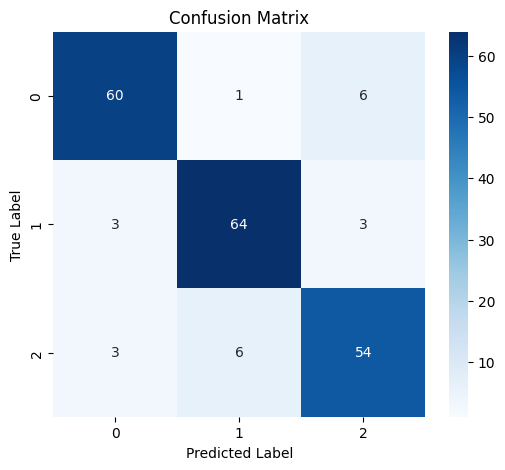

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=8, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.


In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=8, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

# Train individual models
dt_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# Evaluate individual models
y_pred_dt = dt_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)
y_pred_lr = lr_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Define Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('dt', dt_clf), ('svm', svm_clf), ('lr', lr_clf)],
    final_estimator=LogisticRegression()
)

# Train Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Evaluate Stacking Classifier
y_pred_stack = stacking_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)

# Print accuracy scores
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Stacking Classifier Accuracy: {accuracy_stack:.4f}")


Decision Tree Accuracy: 0.7700
SVM Accuracy: 0.9250
Logistic Regression Accuracy: 0.7250
Stacking Classifier Accuracy: 0.9100


37. Train a Random Forest Classifier and print the top 5 most important features.


In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=8, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    "Feature": [f"Feature {i}" for i in range(X.shape[1])],
    "Importance": feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Print top 5 most important features
print("Top 5 Most Important Features:")
print(feature_df.head(5))



Top 5 Most Important Features:
     Feature  Importance
2  Feature 2    0.193299
3  Feature 3    0.118216
8  Feature 8    0.114674
5  Feature 5    0.111444
6  Feature 6    0.091751


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.


In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=8, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier with Decision Trees as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate performance using Precision, Recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        67
           1       0.86      0.86      0.86        70
           2       0.81      0.86      0.83        63

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.


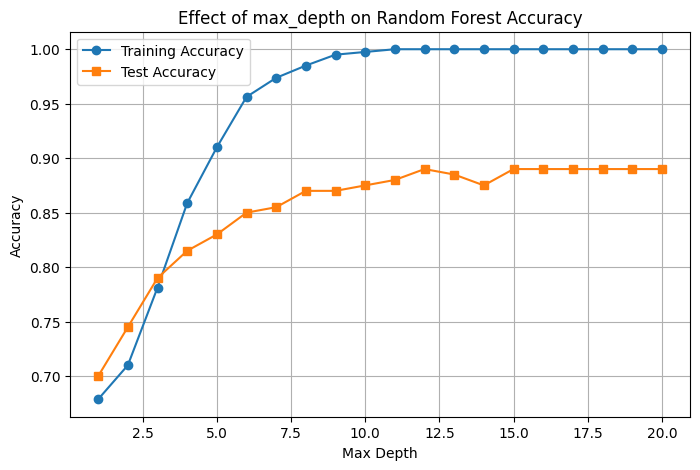

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=8, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of max_depth values to test
max_depth_values = range(1, 21)

# Store accuracy results
train_accuracies = []
test_accuracies = []

# Train Random Forest for different max_depth values
for max_depth in max_depth_values:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_clf.fit(X_train, y_train)

    # Evaluate on training and test data
    train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
    test_acc = accuracy_score(y_test, rf_clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracy vs. max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(max_depth_values, test_accuracies, label="Test Accuracy", marker="s")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.legend()
plt.grid()
plt.show()


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.


Mean Squared Error (Decision Tree as base estimator): 2594.4270
Mean Squared Error (KNN as base estimator): 3524.3855


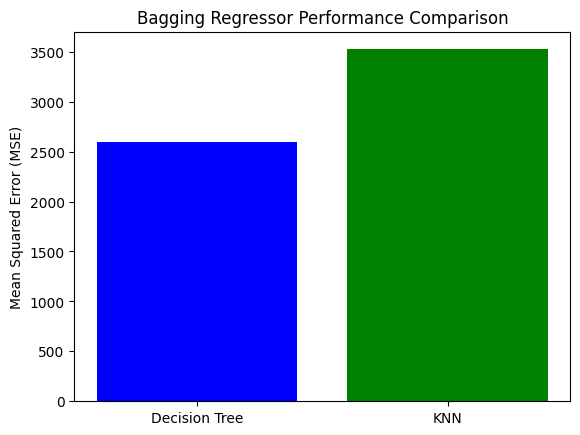

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
dt_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train Bagging Regressor with Decision Tree
bagging_dt = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Train Bagging Regressor with KNN
bagging_knn = BaggingRegressor(estimator=knn_regressor, n_estimators=50, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print MSE results
print(f"Mean Squared Error (Decision Tree as base estimator): {mse_dt:.4f}")
print(f"Mean Squared Error (KNN as base estimator): {mse_knn:.4f}")

# Compare performance visually
plt.bar(["Decision Tree", "KNN"], [mse_dt, mse_knn], color=['blue', 'green'])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging Regressor Performance Comparison")
plt.show()


41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.


ROC-AUC Score: 0.9428


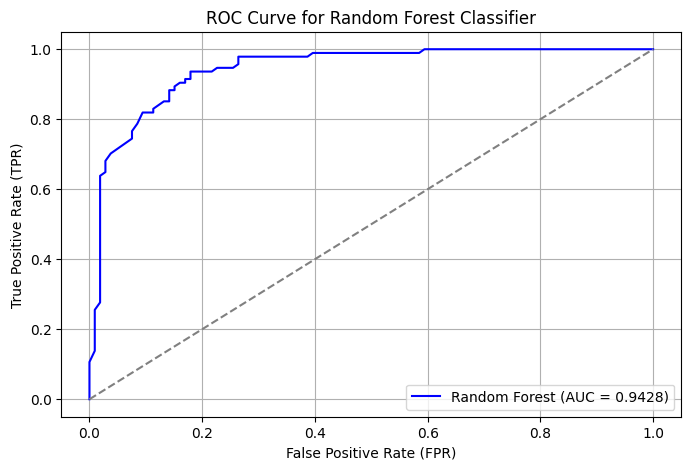

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=8, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get predicted probabilities
y_probs = rf_clf.predict_proba(X_test)[:, 1]  # Get probability of the positive class

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()


42. Train a Bagging Classifier and evaluate its performance using cross-validatio.


In [28]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=8, random_state=42)

# Define Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(bagging_clf, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-validation scores: [0.865 0.88  0.88  0.9   0.88 ]
Mean Accuracy: 0.8810
Standard Deviation: 0.0111


43. Train a Random Forest Classifier and plot the Precision-Recall curv.


Average Precision Score: 0.9234


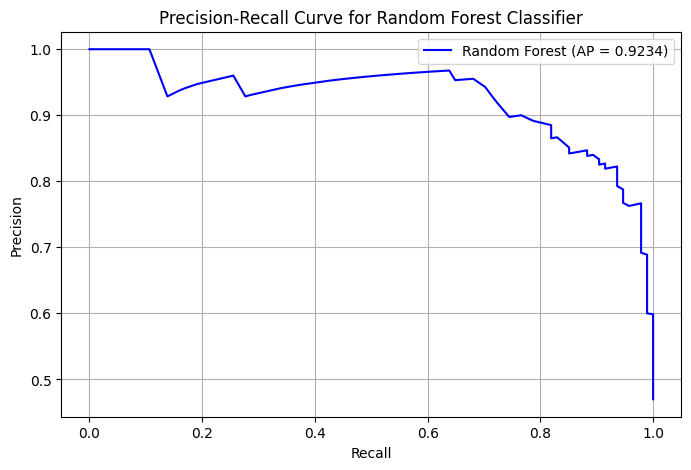

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=8, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_probs)
print(f"Average Precision Score: {avg_precision:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f"Random Forest (AP = {avg_precision:.4f})", color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest Classifier")
plt.legend()
plt.grid()
plt.show()


44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.


In [30]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=8, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Define Stacking Classifier with Logistic Regression as final estimator
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), cv=5)
stacking_clf.fit(X_train, y_train)

# Train individual models for comparison
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_stack = stacking_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_lr = lr_clf.predict(X_test)

acc_stack = accuracy_score(y_test, y_pred_stack)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Print Accuracy Scores
print(f"Accuracy (Stacking Classifier): {acc_stack:.4f}")
print(f"Accuracy (Random Forest): {acc_rf:.4f}")
print(f"Accuracy (Logistic Regression): {acc_lr:.4f}")


Accuracy (Stacking Classifier): 0.8700
Accuracy (Random Forest): 0.8700
Accuracy (Logistic Regression): 0.6750


45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

Bootstrap Sample Size: 0.5, MSE: 2637.7477
Bootstrap Sample Size: 0.7, MSE: 2711.9293
Bootstrap Sample Size: 0.9, MSE: 2725.8609
Bootstrap Sample Size: 1.0, MSE: 2594.4270


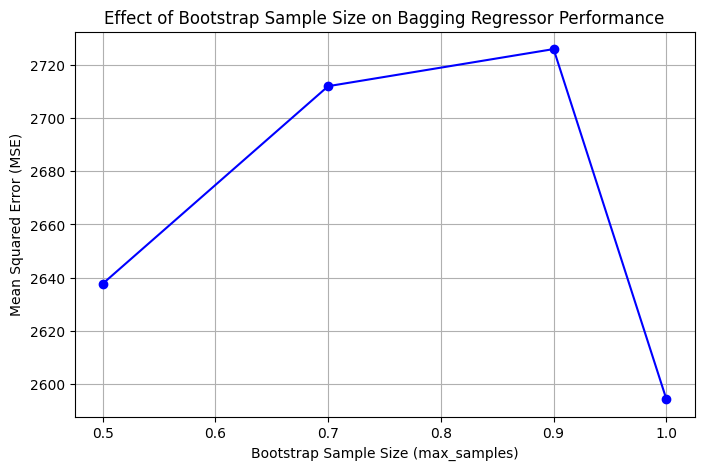

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different bootstrap sample sizes
bootstrap_sizes = [0.5, 0.7, 0.9, 1.0]
mse_scores = []

# Train Bagging Regressor with different bootstrap sample sizes
for size in bootstrap_sizes:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=size,  # Varying bootstrap sample size
        random_state=42
    )
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Bootstrap Sample Size: {size}, MSE: {mse:.4f}")

# Plot MSE vs Bootstrap Sample Size
plt.figure(figsize=(8, 5))
plt.plot(bootstrap_sizes, mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Bootstrap Sample Size (max_samples)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Bootstrap Sample Size on Bagging Regressor Performance")
plt.grid()
plt.show()
